# Predict body type based on Measurements

**Model 4: Recommending outfits based on Body type calculated from User's body measurements.**

**Overall Model Mapping:**

*BWH measurements --> Body-Type --> Dress-types --> Outfits*

*   **Part 1:** Predict Body-type for given Bust, waist and hip measurements.
*   **Part 2:** Recommend Outfits suitable for derived Body type.
    *   Research on dress-types recommended for each Body type.Ex: A-line dresses and Full- sleeve dresses are recommended for Pear body-type.
    *   Model to provide list of recommendations for particular dress-type.
    *   Keeping the model up to date.





# Part1: BWH measurements --> Body-Type

The body type can be determined by the ratio of measurements between the bust, waist, and hip. There are several methods to calculate body type, but one common formula is the waist-to-hip ratio (WHR) and the bust-to-waist ratio (BWR).

**WHR(Waist-to-Hip Ratio)**


*   Pear-shaped body: WHR less than or equal to 0.80
*   Hourglass-shaped body: WHR between 0.81 and 0.85
*   Apple-shaped body: WHR greater than 0.85

**BWR(bust-to-waist ratio)**


*   Apple-shaped body: BWR 0.80 or lower
*   Hourglass-shaped body: BWR between 0.81 to 0.85 
*   Pear-shaped body: BWR Above 0.85 


There is no single formula that combines both bust-to-waist ratio (BWR) and waist-to-hip ratio (WHR) to predict body types like pear, apple, and hourglass. However, we can use a combination of the two ratios to get a general sense of body type.

For example, if someone has a WHR of 0.75 (indicating a pear-shaped body) and a BWR of 1.3 (indicating a more busty upper body), they may have a combination of both pear and hourglass body shapes.

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Dataset source: https://www.kaggle.com/datasets/saurabhshahane/body-measurements-dataset

In [5]:
link1 = 'https://drive.google.com/file/d/1sxZZQdDampqQ0Ar6PFAaayqaGHSzJqQN/view?usp=sharing'
id1 = link1.split("/")[-2]
 
downloaded11 = drive.CreateFile({'id':id1})
downloaded11.GetContentFile('BodyMeasurements.csv') 
num = pd.read_csv('BodyMeasurements.csv')
df = num.loc[:, ['ChestWidth ', 'Waist ', 'Hips ']]
df.columns = ['Bust', 'Waist', 'Hip']
df.dropna(inplace=True)
df.head()

,Bust,Waist,Hip
0,20,14,22
1,17,21,25
2,16,10,15
3,18,19,14
4,18,11,30


In [6]:
df['WaistToHipRatio'] = df['Waist'] / df['Hip']
df.head()

,Bust,Waist,Hip,WaistToHipRatio
0,20,14,22,0.636364
1,17,21,25,0.840000
2,16,10,15,0.666667
3,18,19,14,1.357143
4,18,11,30,0.366667


In [7]:
df['BustToWaistRatio'] = df['Bust'] / df['Waist']
df

,Bust,Waist,Hip,WaistToHipRatio,BustToWaistRatio
0,20,14,22,0.636364,1.428571
1,17,21,25,0.840000,0.809524
2,16,10,15,0.666667,1.600000
3,18,19,14,1.357143,0.947368
4,18,11,30,0.366667,1.636364
...,...,...,...,...,...
711,14,18,30,0.600000,0.777778
712,12,2,26,0.076923,6.000000
713,11,22,22,1.000000,0.500000
714,14,18,30,0.600000,0.777778


In [8]:
def determine_bodytype(df):
    # Add a new column called 'Bodytype'
    df['Bodytype'] = ''

    # Loop through each row in the dataframe
    for i in range(len(df)):
        # Determine body type based on WHR and BWR
        whr = df.at[i, 'WaistToHipRatio']
        bwr = df.at[i, 'BustToWaistRatio']
        if whr <= 0.80 and bwr > 0.85:
            df.at[i, 'Bodytype'] = 'Pear-Hourglass'
        elif whr <= 0.80 and bwr > 0.85:
            df.at[i, 'Bodytype'] = 'Hourglass'
        elif whr > 0.85 and bwr <= 0.80:
            df.at[i, 'Bodytype'] = 'Apple'
        elif whr <= 0.80:
            df.at[i, 'Bodytype'] = 'Pear'
        else:
            df.at[i, 'Bodytype'] = 'Rectangle'
    
    return df

In [9]:
df = determine_bodytype(df)
df

,Bust,Waist,Hip,WaistToHipRatio,BustToWaistRatio,Bodytype
0,20,14,22,0.636364,1.428571,Pear-Hourglass
1,17,21,25,0.840000,0.809524,Rectangle
2,16,10,15,0.666667,1.600000,Pear-Hourglass
3,18,19,14,1.357143,0.947368,Rectangle
4,18,11,30,0.366667,1.636364,Pear-Hourglass
...,...,...,...,...,...,...
711,14,18,30,0.600000,0.777778,Pear
712,12,2,26,0.076923,6.000000,Pear-Hourglass
713,11,22,22,1.000000,0.500000,Apple
714,14,18,30,0.600000,0.777778,Pear


In [10]:
value_counts = df['Bodytype'].value_counts()

print(value_counts)

Rectangle         319
Apple             275
Pear-Hourglass     97
Pear               25
Name: Bodytype, dtype: int64


In [11]:
count_rect = len(df[df['Bodytype'] == 'Rectangle'])
print(count_rect)

319


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Bust', 'Waist', 'Hip']], df['Bodytype'], test_size=0.2, random_state=42)

# create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9166666666666666


In [13]:
input_values = np.array([[20, 14, 22]])

# make a prediction using the trained classifier
predicted_bodytype = clf.predict(input_values)

print('Predicted bodytype:', predicted_bodytype)

Predicted bodytype: ['Pear-Hourglass']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [14]:
input_values = np.array([[32, 10, 32]])

# make a prediction using the trained classifier
predicted_bodytype = clf.predict(input_values)

print('Predicted bodytype:', predicted_bodytype)

Predicted bodytype: ['Pear-Hourglass']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
input_values = np.array([[32, 30, 37.5]])

# make a prediction using the trained classifier
predicted_bodytype = clf.predict(input_values)

print('Predicted bodytype:', predicted_bodytype)

Predicted bodytype: ['Rectangle']


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Part2: Body-Type --> Dress-types

Some commonly recommended dress types for different body types are:

 

*   **Pear-shaped body**: A-line dresses, wrap dresses, fit and flare dresses,high-waisted skirts, and bootcut jeans.
*   **Apple-shaped body**: Empire waist dresses, flowy tunics, V-neck tops, and high-waisted pants.
*   **Hourglass-shaped body**: Bodycon dresses, pencil skirts, tailored blazers, and high-waisted jeans.
*   **Rectangular-shaped body**: Shift dresses, sheath dresses, peplum tops, and flared pants.


It's worth noting that everyone's body is unique, and what looks good on one person may not look good on another, even if they have the same body type. Additionally, fashion rules are meant to be broken, and it's important to wear what makes you feel comfortable and confident.

**Table of mapping:**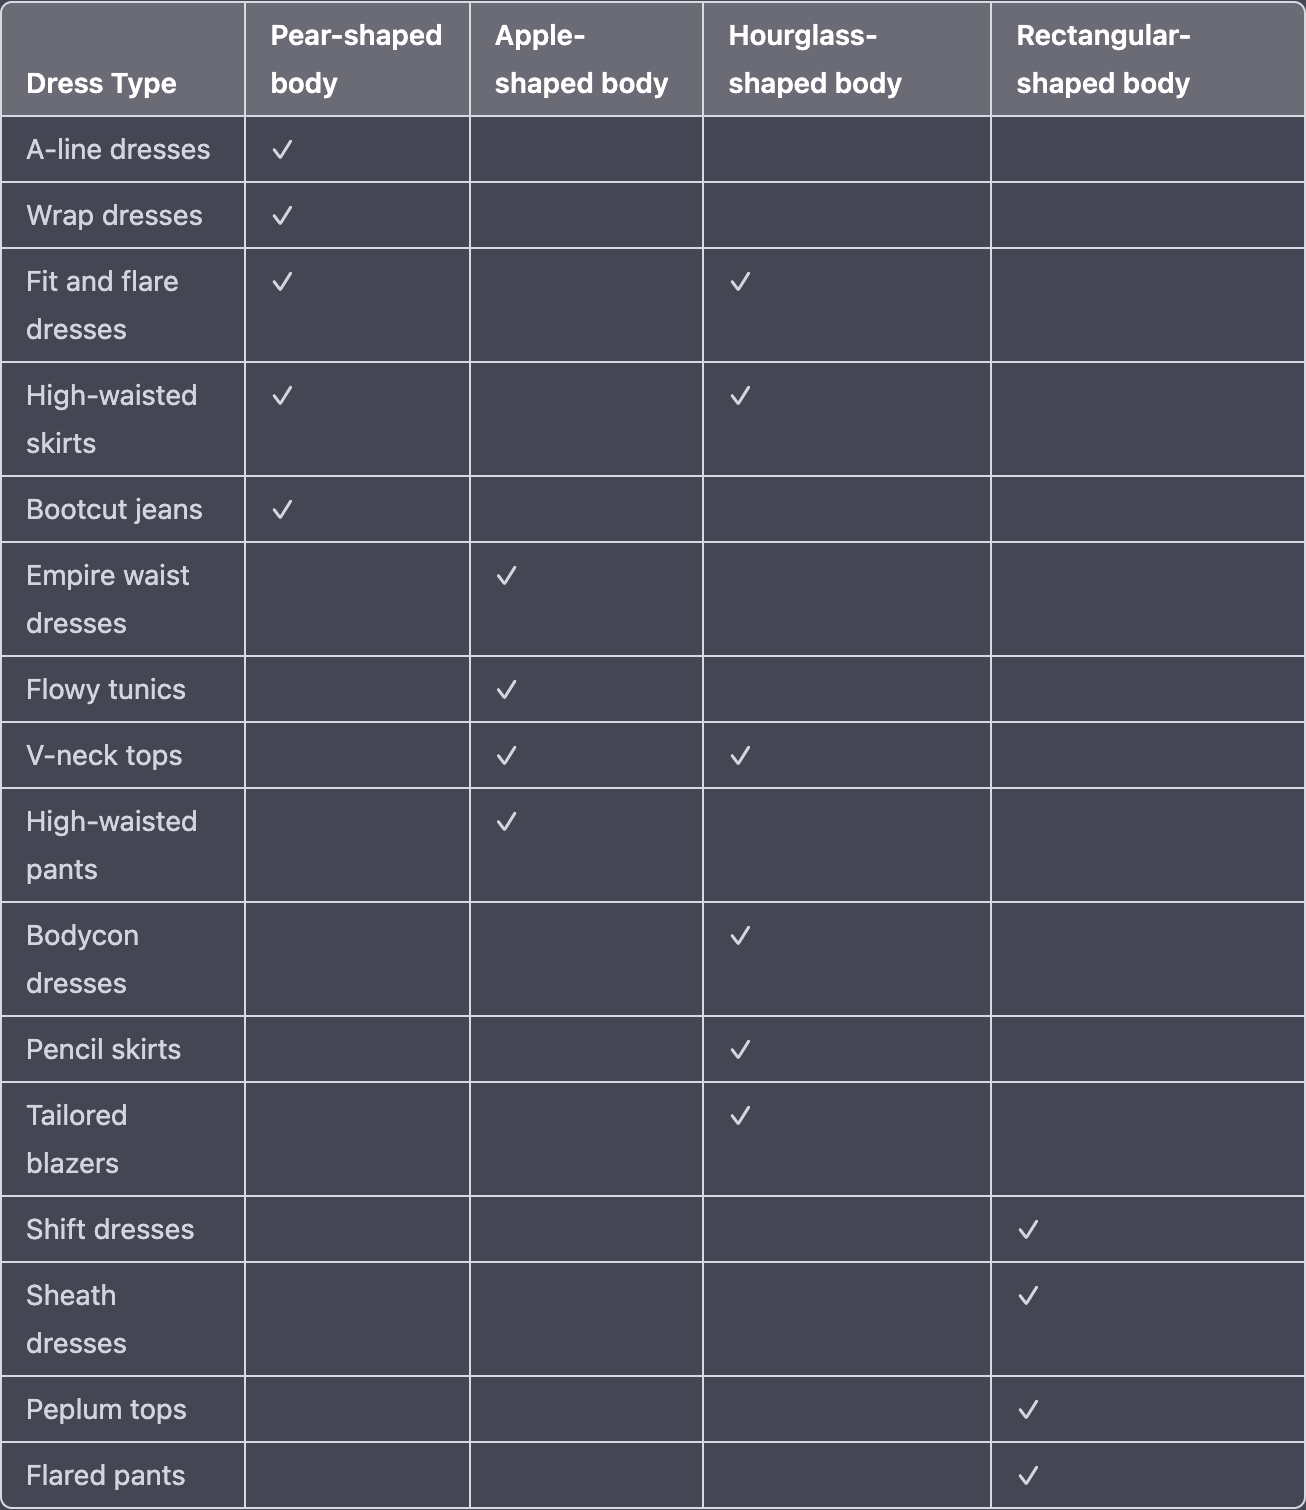

In [16]:
import pandas as pd

body_types = {
    "Pear": ["A-line dress", "wrap dress", "fit and flare dress"],
    "Apple": ["Empire waist", "tunic", "V-neck"],
    "Hourglass": ["Off-shoulder", "Bodycon", "pencil skirt", "blazers"],
    "Rectangle": ["Shift", "sheath", "peplum", "flared palazzos"],
    "Pear-Hourglass": ['Wrap dress', 'Fit and flare dress', 'Pencil skirt', 'Midi']
}

# define a function to map the body type to dress type
def map_body_to_dress(bodytype):
    for key, value in body_types.items():
        if bodytype == key:
            return value
    return "Unknown"

# create a new column "Dresstype" based on the "Bodytype" column
df["Dresstype"] = df["Bodytype"].apply(map_body_to_dress)

# print the updated DataFrame
# print(df)
df.head()

,Bust,Waist,Hip,WaistToHipRatio,BustToWaistRatio,Bodytype,Dresstype
0,20,14,22,0.636364,1.428571,Pear-Hourglass,"[Wrap dress, Fit and flare dress, Pencil skirt..."
1,17,21,25,0.840000,0.809524,Rectangle,"[Shift, sheath, peplum, flared palazzos]"
2,16,10,15,0.666667,1.600000,Pear-Hourglass,"[Wrap dress, Fit and flare dress, Pencil skirt..."
3,18,19,14,1.357143,0.947368,Rectangle,"[Shift, sheath, peplum, flared palazzos]"
4,18,11,30,0.366667,1.636364,Pear-Hourglass,"[Wrap dress, Fit and flare dress, Pencil skirt..."


List of DressTypes:
'V-neck tops', 'tailored blazers', 'sheath dresses', 'high-waisted pants', 'bootcut jeans', 'peplum tops', 'Wrap dresses', 'fit and flare dresses', 'Bodycon dresses', 'Shift dresses', 'A-line dresses', 'Midi dresses', 'Pencil skirts', 'flowy tunics', 'Crop tops', 'high-waisted jeans', 'flared pants', 'wrap dresses', 'fit and flare dresses'

Keywords to find in dataset:


*   Pear -> wrap dress, fit and flare dress, A-line dress
*   Apple -> ***Empire waist***, V-neck, tunic
*   Hourglass -> Off-shoulder, ***Bodycon***, ***pencil skirt***, ***blazers***
*   Rectangle -> shift, ***sheath***, Flared Palazzos, peplum
*   Pear-Hourglass -> wrap dress, fit and flare dress, ***pencil skirt***, midi

TODO: In bold are not being filtered from the dataset as of now. 

# Importing Myntra Dataset

In [17]:
link2 = 'https://drive.google.com/file/d/1ypzPWMt5FqtUYtS0kN_OpXjtYKXZxno9/view?usp=sharing'
id2 = link2.split("/")[-2]
 
downloaded12 = drive.CreateFile({'id':id2})
downloaded12.GetContentFile('myntra-com-data.csv') 
num = pd.read_csv('myntra-com-data.csv', error_bad_lines=False)
df1 = num.loc[:, ['link', 'brand', 'title', 'product_type', 'images', 'product_details']]
# df.columns = ['Bust', 'Waist', 'Hip']
df1.dropna(inplace=True)
df1.head()

<ipython-input-17-66e55d0b2232>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  num = pd.read_csv('myntra-com-data.csv', error_bad_lines=False)
b'Skipping line 20: expected 25 fields, saw 26\nSkipping line 106: expected 25 fields, saw 26\nSkipping line 116: expected 25 fields, saw 26\nSkipping line 119: expected 25 fields, saw 26\nSkipping line 132: expected 25 fields, saw 26\nSkipping line 139: expected 25 fields, saw 26\nSkipping line 239: expected 25 fields, saw 26\nSkipping line 284: expected 25 fields, saw 26\nSkipping line 294: expected 25 fields, saw 26\nSkipping line 332: expected 25 fields, saw 26\nSkipping line 389: expected 25 fields, saw 26\nSkipping line 434: expected 25 fields, saw 26\nSkipping line 438: expected 25 fields, saw 26\nSkipping line 439: expected 25 fields, saw 26\nSkipping line 453: expected 25 fields, saw 26\nSkipping line 491: expected 25 fields, saw 26\nSkippin

,link,brand,title,product_type,images,product_details
0,https://www.myntra.com/tops/imara/imara-women-...,IMARA,IMARA Women Black Solid Top,Top,http://assets.myntassets.com/v1/assets/images/...,"Black solid woven regular top,has a V-neck, th..."
1,https://www.myntra.com/kurtas/house-of-pataudi...,House of Pataudi,House of Pataudi Men Black Printed Straight Kurta,Straight Kurta,http://assets.myntassets.com/v1/assets/images/...,"Black printed straight kurta, has a mandarin c..."
3,https://www.myntra.com/dupatta/dupatta-bazaar/...,Dupatta Bazaar,Dupatta Bazaar Pink Dupatta,Dupatta,http://assets.myntassets.com/v1/assets/images/...,Pink dupatta&nbsp;with crinkled effect
4,https://www.myntra.com/kurta-sets/manyavar/man...,Manyavar,Manyavar Men Yellow & White Self Design Kurta ...,Kurta with Churidar,http://assets.myntassets.com/v1/assets/images/...,Yellow and white self design kurta with churid...
5,https://www.myntra.com/kurta-sets/wintage/wint...,Wintage,Wintage Men Beige Solid Kurta with Pyjamas,Kurta with Pyjamas,http://assets.myntassets.com/v1/assets/images/...,Beige solid kurta with pyjamas Beige straight ...


In [18]:
num_rows = df1.shape[0]
print('Number of rows:', num_rows)

Number of rows: 12873


In [19]:
import re

keywords = ['wrap dress', 'fit and flare dress', 'A-line dress', 'Empire waist', 'V-neck', 'tunic', 'Bodycon', 'pencil skirt', 'blazers', 'shift','Off-shoulder', 'sheath', 'Flared Palazzos', 'peplum', 'midi']

# Add .strip().lower() to each keyword to ensure they're all in lowercase and have no extra spaces
keywords = [kw.strip().lower() for kw in keywords]

# Join keywords with '|' operator for regex pattern
pattern = '|'.join(keywords)

# Use str.contains() with regex pattern and case-insensitive flag
filtered_df = df1[df1['product_type'].str.contains(pattern, flags=re.IGNORECASE) | 
                 df1['product_details'].str.contains(pattern, flags=re.IGNORECASE) | 
                 df1['title'].str.contains(pattern, flags=re.IGNORECASE) | 
                 df1['link'].str.contains(pattern, flags=re.IGNORECASE) | 
                 df1['images'].str.contains(pattern, flags=re.IGNORECASE)]
filtered_df.head()

,link,brand,title,product_type,images,product_details
0,https://www.myntra.com/tops/imara/imara-women-...,IMARA,IMARA Women Black Solid Top,Top,http://assets.myntassets.com/v1/assets/images/...,"Black solid woven regular top,has a V-neck, th..."
13,https://www.myntra.com/kurtas/anouk/anouk-wome...,Anouk,Anouk Women Navy Printed Straight Kurta,Straight Kurta,http://assets.myntassets.com/v1/assets/images/...,"Navy blue printed straight kurta, has a v-neck..."
35,https://www.myntra.com/tunics/shree/shree-char...,Shree,Shree Charcoal Grey Solid Tunic,Tunic,http://assets.myntassets.com/v1/assets/images/...,"Charcoal grey solid tunic, has a shirt collar,..."
37,https://www.myntra.com/kurtas/sangria/sangria-...,Sangria,Sangria Women Maroon Printed A-Line Kurta,A-Line Kurta,http://assets.myntassets.com/v1/assets/images/...,"Maroon printed A-line kurta, has a V-neck, thr..."
43,https://www.myntra.com/dresses/i-am-for-you/i-...,I AM FOR YOU,I AM FOR YOU Women Orange & Black Printed A-Li...,A-Line Dress,http://assets.myntassets.com/v1/assets/images/...,"Orange and black printed woven A-line dress, h..."


In [20]:
filtered_df.shape[0]

1605

In [21]:
keywords = ['Off-shoulder']
# Bodycon, Empire waist, pencil skirt, blazers , sheath
# Add .strip().lower() to each keyword to ensure they're all in lowercase and have no extra spaces
keywords = [kw.strip().lower() for kw in keywords]

# Join keywords with '|' operator for regex pattern
pattern = '|'.join(keywords)

# Use str.contains() with regex pattern and case-insensitive flag
filtered_df = df1[df1['product_type'].str.contains(pattern, flags=re.IGNORECASE) | 
                 df1['product_details'].str.contains(pattern, flags=re.IGNORECASE) | 
                 df1['title'].str.contains(pattern, flags=re.IGNORECASE)]

filtered_df.shape[0]

22

In [22]:
import pandas as pd

body_types = {
    "Pear": "A-line dress, wrap dress, fit and flare dress",
    "Apple": "Empire waist, tunic, V-neck",
    "Hourglass": "Off-shoulder, Bodycon, pencil skirt, blazers",
    "Rectangle": "Shift, sheath, peplum , flared palazzos",
    "Pear-Hourglass": 'Wrap dress, Fit and flare dress, Pencil skirt, Midi'
}

dfmap = pd.DataFrame.from_dict(body_types, orient='index')
dfmap = dfmap.reset_index()
dfmap.columns = ['Bodytype', 'Dresstypes']
print(dfmap)

         Bodytype                                         Dresstypes
0            Pear      A-line dress, wrap dress, fit and flare dress
1           Apple                        Empire waist, tunic, V-neck
2       Hourglass       Off-shoulder, Bodycon, pencil skirt, blazers
3       Rectangle            Shift, sheath, peplum , flared palazzos
4  Pear-Hourglass  Wrap dress, Fit and flare dress, Pencil skirt,...


In [23]:
def recommend(input_values):
  predicted_bodytype = clf.predict(input_values)
  dress_types = dfmap.loc[dfmap['Bodytype'] == predicted_bodytype[0], 'Dresstypes'].iloc[0]
  keywords = dress_types.split(',')
  # Bodycon, Empire waist, pencil skirt, blazers , sheath
  # Add .strip().lower() to each keyword to ensure they're all in lowercase and have no extra spaces
  keywords = [kw.strip().lower() for kw in keywords]

  # Join keywords with '|' operator for regex pattern
  pattern = '|'.join(keywords)

  # Use str.contains() with regex pattern and case-insensitive flag
  filtered_df = df1[df1['product_type'].str.contains(pattern, flags=re.IGNORECASE) | 
                  df1['product_details'].str.contains(pattern, flags=re.IGNORECASE) | 
                  df1['title'].str.contains(pattern, flags=re.IGNORECASE)]

  return filtered_df

In [24]:
result = recommend([[20, 14, 22]])
result

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,link,brand,title,product_type,images,product_details
68,https://www.myntra.com/2492960,Global Desi,Global Desi Black Sheer Flared Midi Skirt,Midi Skirt,http://assets.myntassets.com/v1/assets/images/...,Black sheer midi skirt with gathered and pleat...
78,https://www.myntra.com/dresses/aks/aks-women-o...,AKS,AKS Women Off-White & Pink Printed Fit and Fla...,Fit and Flare Dress,http://assets.myntassets.com/v1/assets/images/...,Off-White and pink printed woven fit and flare...
80,https://www.myntra.com/dresses/gerua/gerua-wom...,GERUA,GERUA Women Navy & Peach-Coloured Printed Cold...,A-Line Dress,http://assets.myntassets.com/v1/assets/images/...,Navy and peach-coloured printed woven midi A-l...
175,https://www.myntra.com/dresses/global-desi/glo...,Global Desi,Global Desi Women Coral Striped Midi Dress,Midi Dress,http://assets.myntassets.com/v1/assets/images/...,"Coral striped woven midi dress, has a round ne..."
395,https://www.myntra.com/dresses/shree/shree-wom...,Shree,Shree Women Pink & Beige Printed Layered Fit a...,Fit and Flare Dress,http://assets.myntassets.com/v1/assets/images/...,Pink and beige printed woven fit and flare dre...
...,...,...,...,...,...,...
13956,https://www.myntra.com/dresses/be-indi/be-indi...,Be Indi,Be Indi Women Blue Printed Fit and Flare Dress,Fit and Flare Dress,http://assets.myntassets.com/v1/assets/images/...,"Blue printed woven fit and flare dress, has a ..."
13960,https://www.myntra.com/7213169,GERUA,GERUA Women Red Solid Midi A-Line Dress,A-Line Dress,http://assets.myntassets.com/v1/assets/images/...,"Red solid woven A-line dress, has a round neck..."
13968,https://www.myntra.com/dresses/khushal-k/khush...,Khushal K,Khushal K Women White & Blue Fit and Flare Dress,Fit and Flare Dress,http://assets.myntassets.com/v1/assets/images/...,White and Blue printed knitted and woven fit a...
14051,https://www.myntra.com/dresses/gerua/gerua-wom...,GERUA,GERUA Women Maroon & Beige Printed Midi A-Line...,A-Line Dress,http://assets.myntassets.com/v1/assets/images/...,Maroon and beige printed woven midi A-line dre...


In [25]:
result = recommend([[32, 30, 37.5]])
result

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,link,brand,title,product_type,images,product_details
51,https://www.myntra.com/palazzos/abhishti/abhis...,Abhishti,Abhishti Women Sea Green & White Solid Flared ...,Flared Palazzo,http://assets.myntassets.com/v1/assets/images/...,A pair of sea green and white solid woven flar...
91,https://www.myntra.com/palazzos/herenow/hereno...,HERE&NOW,HERE&NOW Women Teal Green Printed Flared Palazzos,Flared Palazzo,http://assets.myntassets.com/v1/assets/images/...,A pair of teal green printed woven flared pala...
152,https://www.myntra.com/palazzos/shree/shree-wo...,Shree,Shree Women Grey & Black Printed Flared Palazzos,Flared Palazzo,http://assets.myntassets.com/v1/assets/images/...,A pair of grey and black printed woven flared ...
323,https://www.myntra.com/palazzos/varanga/varang...,Varanga,Varanga Women Pink Flared Solid Palazzos,Flared Solid Palazzos,http://assets.myntassets.com/v1/assets/images/...,A pair of pink solid woven flared palazzos
363,https://www.myntra.com/palazzos/ishin/ishin-wo...,Ishin,Ishin Women Black Flared Solid Palazzos,Flared Solid Palazzos,http://assets.myntassets.com/v1/assets/images/...,"A pair of black solid woven flared palazzos, h..."
...,...,...,...,...,...,...
14058,https://www.myntra.com/8116237,Ethnicity,Ethnicity Girls Pink Woven Design Ready to Wea...,Lehenga & Blouse,http://assets.myntassets.com/v1/assets/images/...,Pink embroidered lehenga choli Pink embroidere...
14105,https://www.myntra.com/1781082,IMARA,IMARA by Women Charcoal & Off-White Printed Fl...,Flared Palazzo,http://assets.myntassets.com/v1/assets/images/...,Charcoal grey and off-white printed woven flar...
14158,https://www.myntra.com/9644017,AASK,AASK Women Black Flared Solid Palazzos,Flared Solid Palazzos,http://assets.myntassets.com/v1/assets/images/...,"A pair of black solid woven flared palazzos, o..."
14218,https://www.myntra.com/8002785,HERE&NOW,HERE&NOW Women Red Flared Hem Design Palazzos,Flared Hem Design Palazzos,http://assets.myntassets.com/v1/assets/images/...,"A pair of red printed woven flared palazzos, h..."
